In this notebook, we explore the Saha equation using F. Chen's expression.

#### <span style="color:GoldenRod "> Import modules </span>

In [1]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
from scipy import constants as sc
from matplotlib import pyplot as plt
from decimal import *
import plasmapy
import astropy

In [2]:
def sciprint(x):
    print(f"x = {x:0.1g}")

# The Saha-Boltzmann equation: first impressions

$$\frac{n_i}{n_n} \sim 2.4 \cdot 10^{21} \frac{T^{3/2}}{n_i} e^{-U_i / k_B T}$$

Where  $n_i$ and $n_n$ are the density of ionized atoms and of neutral atoms (in [nb.m$^{-3}$]), $T$ is the temperature (in [K]), $k_B$ is Boltzmann's constant and $U_i$ is the ionisation energy of the specie considered (in [J]).

It is generally more convenient to define: $$x = \frac{n_i}{n}$$ where where $n = n_i + n_n$.

<span style="color:ForestGreen">
<strong>Exercise:</strong> Show that this expression can be rewritten as:
$$ \frac{x^2}{1-x} = 2.4 \cdot 10^{21} \frac{T^{3/2}}{n} e^{-U_i / k_B T}$$    
</span>

### <span style="color:GoldenRod "> 1. Numerical computation </span>

#### <span style="color:GoldenRod "> 1.1. First, we compute the right hand-side term. </span>

In [3]:
def rhs_Saha_Chen(n,T,Ui):
    """Computes the right hand side of Saha's equation for a given temperature T"""
    rhs = 2.4*1e21*(T**(3/2)/n)*np.exp(-(Ui/(sc.k*T)))
    return rhs

#### <span style="color:GoldenRod "> 1.2. Then, we solve for the ionisation fraction $x$. </span>

In [4]:
#Assuming x > 0 forces the solver to return only positive solutions
x = Symbol('x', positive=True) 

In [5]:
def solve_Saha(n,T,Ui):
    """Computes the ionisation fraction x for a given temperature T"""
    #Note: sympy.solvers.solve struggles when rhs is large. So let's use two cases:
    if (rhs_Saha_Chen(n,T,Ui) <= 1e2):
        sol = solve((x**2/(1-x)) - rhs_Saha_Chen(n,T,Ui),x) 
    else:
        sol = [1 - 1/rhs_Saha_Chen(n,T,Ui)] #for x->1, x²/(1-x)-> 1/(1-x)
    if len(sol)==0:
        sol = [np.nan]  #If there is no solution, returns a NaN rather than an empty array.
    return sol

### 2. Examples

#### 2.1. ITER Plasma:

$n \sim 1 \cdot 10^{19} \text{ m}^{-3}$ and $T \sim 8 \text{ keV}$, $U_i \sim 15.6 \text{ eV (for Deuterium)}$

In [6]:
n = 1e19 #[nb.m^-3]
T = 8e3 * sc.electron_volt / sc.k #[K]
Ui = 15.5*sc.electron_volt #13.6 eV -> [J], ionisation energy of hydrogen

x_i = solve_Saha(n,T,Ui)[0]
sciprint(x_i)

x = 1


#### 2.2. This room:

$n \sim 3 \cdot 10^{25} \text{ m}^{-3}$, $T \sim 300 \text{ K}$ and $U_i \sim 14.5 \text{ eV}$ (for $N_2$)

In [7]:
n = 3e25 #[nb.m^-3]
T = 300 #[K]
Ui = 14.5*sc.electron_volt #14.5 eV -> [J], ionisation energy of N2

x_i = solve_Saha(n,T,Ui)[0]
sciprint(x_i)

x = 1e-122


<span style="color:GoldenRod ">
Note: This extremely low value of ionisation is unrealistically low, because Saha's equation does not take into account ionisation by cosmic rays which takes the real $n_i / n_n$ ratio closer to $10^{-22}$. That's still not much.
</span>

#### 2.3. A wood burning stove:

$n \sim 3 \cdot 10^{25} \text{ m}^{-3}$, $T \sim 460 \ ^\circ\text{C}$ and $U_i \sim 14.5 \text{ eV}$ (for $N_2$)

In [8]:
n = 3e25 #[nb.m^-3]
T = 460 + 273.15 #[K]
Ui = 14.5*sc.electron_volt #14.5 eV -> [J], ionisation energy of N2

x_i = solve_Saha(n,T,Ui)[0]
sciprint(x_i)

x = 2e-50


#### 2.4. Lightning

$n \sim 3 \cdot 10^{25} \text{ m}^{-3}$ and $T \sim 20,000  \ ^\circ\text{C}$, $U_i \sim 14.5 \text{ eV}$ (for $N_2$)

In [9]:
n = 3e25 #[nb.m^-3]
T = 20000 #[K]
Ui = 14.5*sc.electron_volt #14.5 eV -> [J], ionisation energy of N2

x_i = solve_Saha(n,T,Ui)[0]
sciprint(x_i)

x = 0.2


### 3. Plotting x in terms of _T_ 

#### 3.1. At atmospheric density

In [10]:
n = 3e25 #[nb.m^-3]
Ui = 14.5*sc.electron_volt #14.5 eV -> [J], ionisation energy of N2

Ts = np.logspace(0,7,100)
xs = []
for j in range(0, len(Ts)):
    xs = xs + solve_Saha(n,Ts[j],Ui)

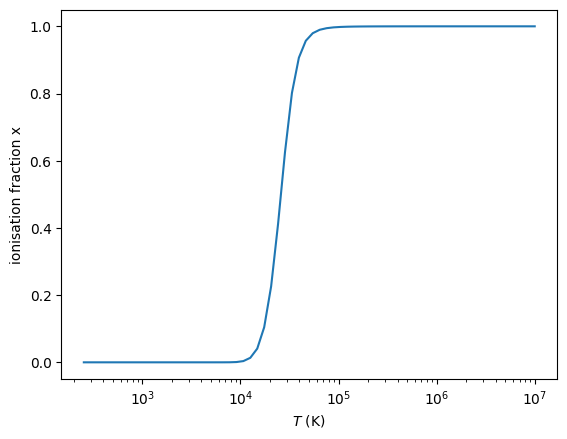

In [11]:
plt.cla()
plt.plot(Ts, xs)

plt.xlabel(r'$T$ (K)')
plt.semilogx()
plt.ylabel('ionisation fraction x')
plt.show()

#### 3.2. At other densities

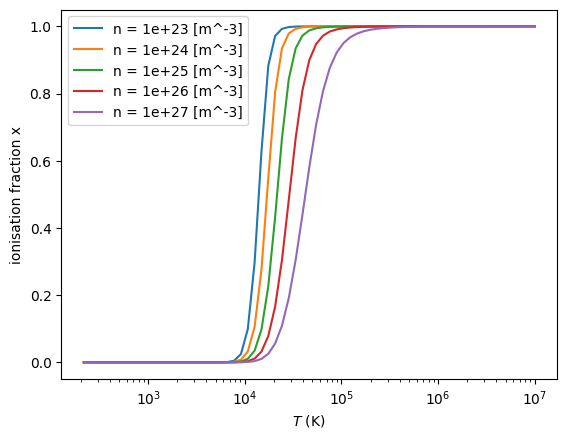

In [12]:
Ts = np.logspace(0,7,100)
Ui = 13.6*sc.electron_volt #Hydrogen. Remember, the usual T-rho diagram is for hydrogen

plt.cla()

for n in [1e23, 1e24, 1e25, 1e26, 1e27]:
    xs = []
    for j in range(0, len(Ts)):
        xs = xs + solve_Saha(n,Ts[j],Ui)
        label = f"n = {n:0.1g} [m^-3]"

    plt.plot(Ts, xs, label=label)
    
plt.xlabel(r'$T$ (K)')
plt.semilogx()
plt.ylabel('ionisation fraction x')
plt.legend()
plt.show()

### 4. Plotting the Saha equation in the Temperature-Density diagram

Let us now assume that $x=1/2$.

We can show that the Saha equation becomes:

$$ \frac{n}{2} = 2.4 \cdot 10^{21} T^{3/2} e^{-U_i/k_B T} $$

In [13]:
Ts = np.logspace(2,10,100)
ns = []
for T in Ts:
    n = 2*2.4e21*T**(3/2)*np.exp(-Ui/(sc.k*T))
    ns = ns+[n]
    
ns = np.array([n if 1e12<n<1e29 else np.nan for n in ns])

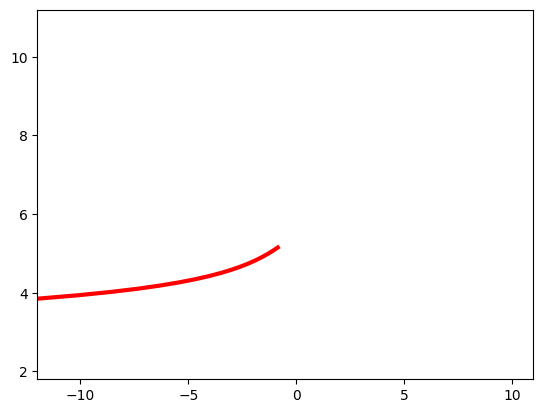

In [14]:
plt.plot(np.log10(ns*sc.m_p*1e-3), np.log10(Ts), color='red', linewidth=3)
plt.xlim([-12, 11])
plt.ylim([1.8, 11.2])
plt.show()

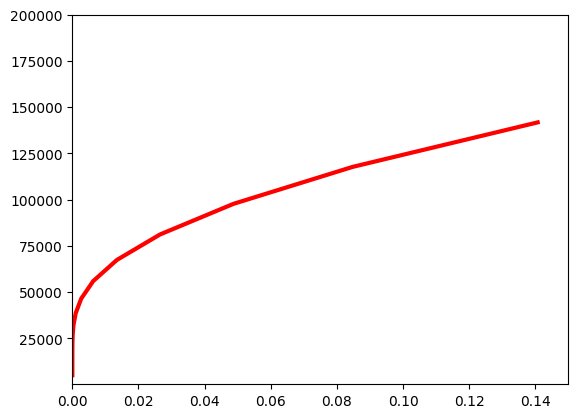

In [15]:
plt.plot(ns*sc.m_p*1e-3, Ts, color='red', linewidth=3)
plt.xlim([0, 0.15])
plt.ylim([1e2, 2e5])
plt.show()

### <span style="color:GoldenRod "> 5. Estimating the average charge </span>

This plasmapy function needs a patch. I am working on it!

In [19]:
import astropy.units as u

#e.g. ITER
n = 1e19 * u.m ** -3
T = 8e3 * u.eV 
Z_n = 1
print('ITER', plasmapy.formulary.ionization.ionization_balance(n, T))

#e.g. This room
n = 3e25 * u.m ** -3
T = 300 *u.K
print('This room', plasmapy.formulary.ionization.ionization_balance(n, T))

#e.g. A wood burning stove
n = 3e25 * u.m ** -3
T = (460 + 273.15) * u.K
print('Flame', plasmapy.formulary.ionization.ionization_balance(n, T))

#e.g. Lightning
n = 3e25 * u.m ** -3
T = 20000 * u.K
print('Lightning', plasmapy.formulary.ionization.ionization_balance(n, T))

#e.g. Laser Plasma interaction
T = 300 * u.eV
n = 2e21 * u.cm ** -3

print('Laser/Plasma', plasmapy.formulary.ionization.ionization_balance(n, T))

ITER 140.26535387816983
This room nan
Flame -0.42655098477739123
Lightning 0.3805460624208602
Laser/Plasma 14.094832073313064
